# DEUS Programming Challenge

### List of contents
1. Import packages
2. Familiarize with data set
    1. Load the data and bring it in the right format
    2. Inspect summary statistics and value distributions
    3. Plot the individual features
3. Simple models to estimate baseline performance
    1. Decision Tree
    2. Logistic Regression
    3. Support Vector Machines
    4. Random Forest
    5. K-nearest Neighbor Classifier
4. Improvements
    1. Hyperparameter tuning
    2. Undersampling
    3. Oversampling
    4. SMOTE
    4. NN Approach
5. One Class Classification

## 1. Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV

import tensorflow as tf
import imblearn

ModuleNotFoundError: No module named 'imblearn'

## 2. Familiarize with the data set

### Load the data frames

In [131]:
reported_frauds = pd.read_csv("data/reported_frauds.csv", sep=',', header=None)
reported_frauds.head()
#print(len(reported_frauds))

,0
0,1401
1,1518
2,1545
3,1810
4,1956


In [132]:
transaction_amounts = pd.read_csv("data/transaction_amounts.csv", sep='|')
transaction_amounts.head()
#print(len(transaction_amounts))

,tra_id,amount_eur
0,167782,2.69
1,61702,44.65
2,244391,12.95
3,151120,44.67
4,85249,0.00


In [133]:
transaction_features = pd.read_csv("data/transaction_features.csv", sep='|')
transaction_features.head()
#print(len(transaction_features))

,transaction_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,...,-0.134401,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922
1,1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,...,-0.747221,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613
2,2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,...,-0.254901,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781
3,3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,...,0.062672,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857
4,4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,...,-0.743983,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443


#### Combine data frames

In [134]:
# create a new data fram to combine the csv files
transactions = transaction_features.copy()
# sort the transaction amounts by there id to match the order of the transaction features
amounts_sorted = transaction_amounts.sort_values("tra_id")
# add them as a column to the new data frame
transactions['amount'] = amounts_sorted['amount_eur']
transactions.head()

,transaction_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount
0,0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,...,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,2.69
1,1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,...,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,44.65
2,2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,...,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,12.95
3,3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,...,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,44.67
4,4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,...,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,0.00


#### Add the target column

In [135]:
# create a new column which indicates whether the transaction was a fraud (=1) or not (=0)
transactions['fraud'] = np.where(transactions['transaction_id'].isin(reported_frauds[0]), 1, 0)

### Inspect summary statistics and value distributions

In [136]:
transactions.groupby('fraud').describe()

transaction_id                                                          \
               count           mean           std     min      25%       50%   
fraud                                                                          
0           284807.0  142646.210669  82359.008568     0.0  71313.5  142650.0   
1              492.0  144263.676829  82347.380928  1401.0  78419.5  141687.0   

                           feature_1            ... feature_28             \
             75%       max     count      mean  ...        75%        max   
fraud                                           ...                         
0      213973.50  285298.0  284807.0 -0.000005  ...   0.078268  33.847808   
1      213925.25  282802.0     492.0 -4.771948  ...   0.381152   1.779364   

         amount                                                        \
          count        mean         std  min     25%     50%      75%   
fraud                                                                   
0      284807.0   88.391630  250.003826  0.0  5.5400  22.000  77.3400   
1         492.0  106.574553  352.885419  0.0  5.4875  22.725  74.2275   

                 
            max  
fraud            
0      25691.16  
1       5680.00  

[2 rows x 240 columns]

In [137]:
# normalize the data frame
df_norm=((transactions-transactions.min())/(transactions.max()-transactions.min()))
# the transaction id should not be used as a feature so we drop it
df_norm = df_norm.drop('transaction_id', axis = 1)
# the target variable should not be normalized
df_norm['fraud'] = transactions['fraud']
df_norm.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount,fraud
0,0.907134,0.740968,0.875968,0.203605,0.762105,0.262603,0.262459,0.787555,0.472324,0.504252,...,0.563883,0.555916,0.668407,0.393865,0.601121,0.409708,0.412816,0.309209,0.000105,0
1,0.943418,0.756776,0.862059,0.274028,0.758239,0.265583,0.259865,0.788693,0.477081,0.508294,...,0.562786,0.554919,0.664993,0.421328,0.580950,0.518696,0.416898,0.313684,0.001738,0
2,0.914457,0.766302,0.869439,0.194860,0.766255,0.255646,0.268427,0.785700,0.459758,0.488793,...,0.555411,0.485574,0.661745,0.364742,0.587330,0.565315,0.415270,0.314053,0.000504,0
3,0.948071,0.763775,0.843051,0.273831,0.764694,0.256127,0.266055,0.782944,0.460540,0.506807,...,0.552830,0.474688,0.666388,0.369584,0.595673,0.445441,0.416081,0.313446,0.001739,0
4,0.947307,0.754195,0.816530,0.226971,0.776863,0.297568,0.261034,0.793626,0.419664,0.526861,...,0.548578,0.443880,0.665853,0.507082,0.605300,0.339308,0.417096,0.313884,0.000000,0


### Plot the data distribution of the individual features

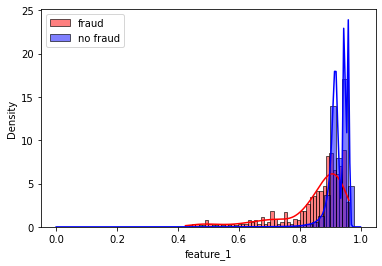

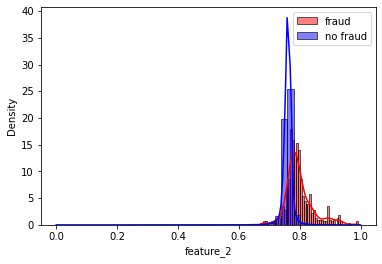

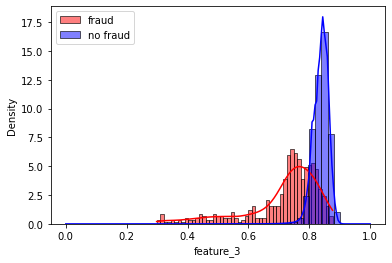

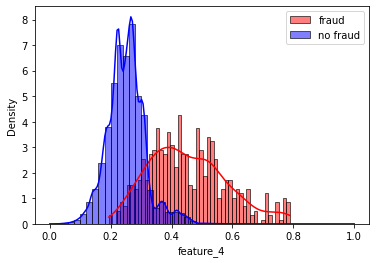

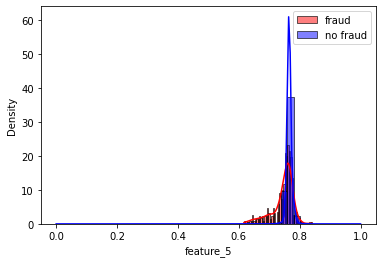

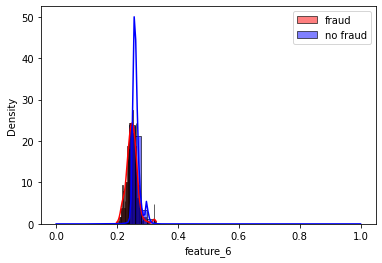

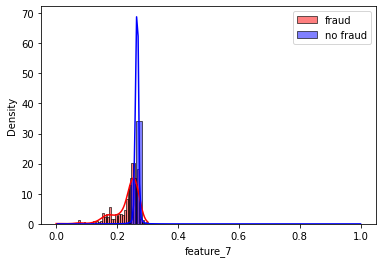

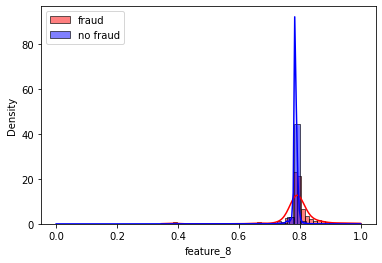

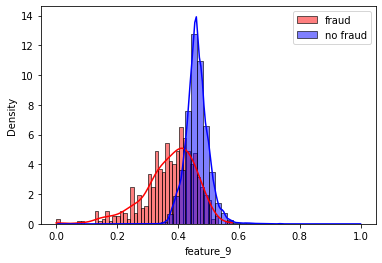

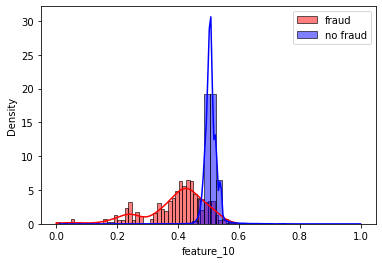

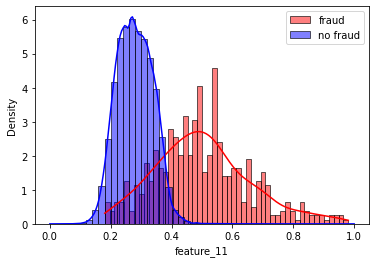

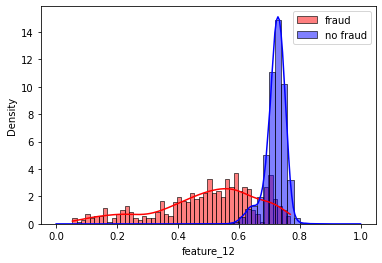

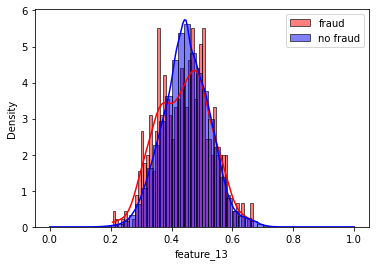

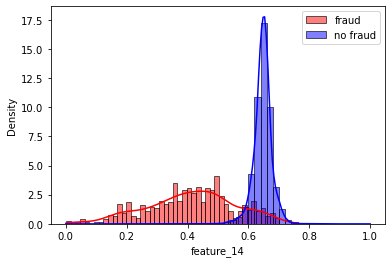

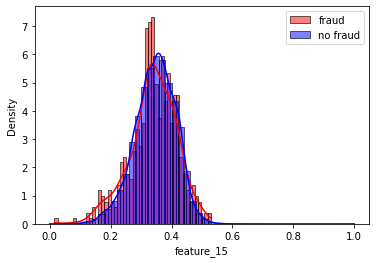

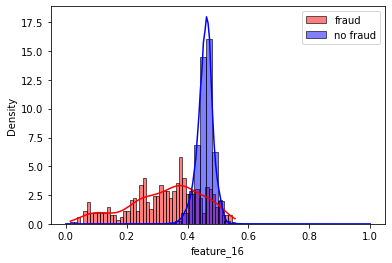

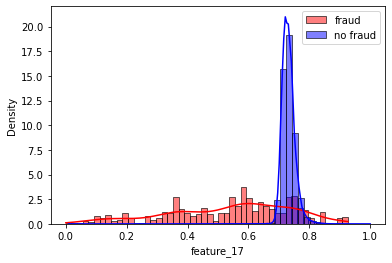

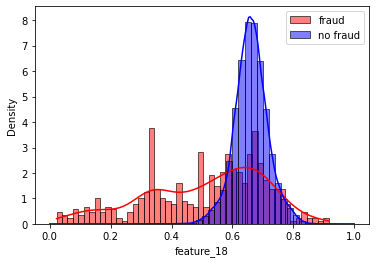

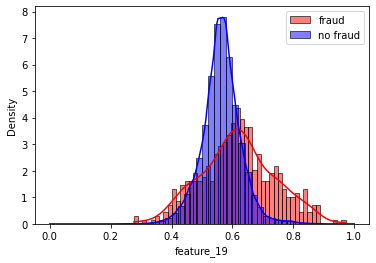

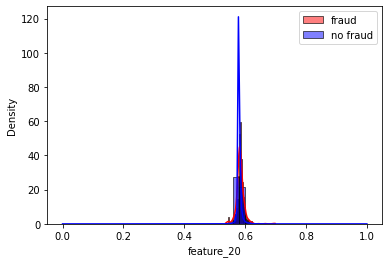

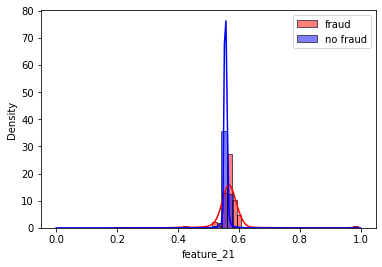

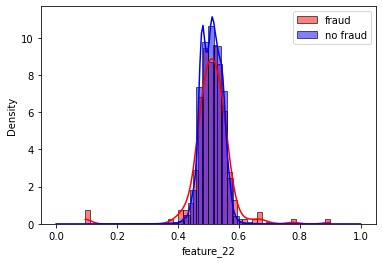

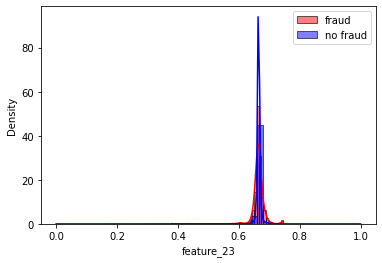

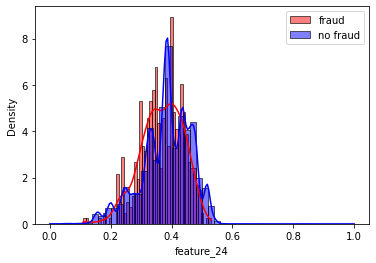

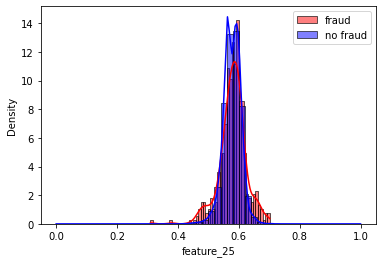

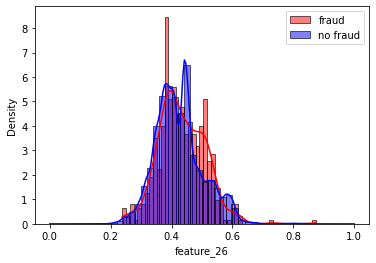

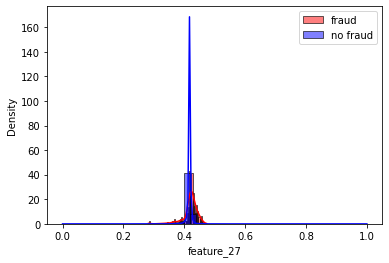

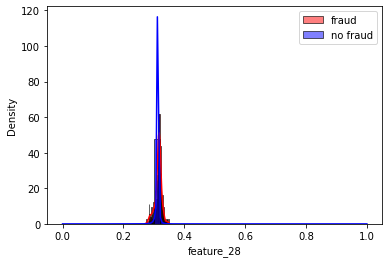

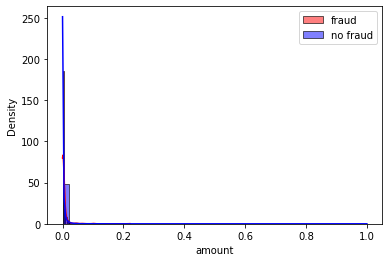

In [10]:
# distribution of the features in fraudulent and non-fraudulent cases
for i, c in enumerate(transactions.columns[1:-1]):
    sns.histplot(data=df_norm[df_norm["fraud"]==1], x=c, bins = 50, color="red", label="fraud", kde=True, stat='density')
    sns.histplot(data=df_norm[df_norm["fraud"]==0], x=c, bins = 50, color="blue", label="no fraud", kde=True, stat='density')

    plt.legend() 
    plt.show()

### Create the data set

In [178]:
# split the data set into input X and output y
X = df_norm.drop('fraud', axis = 1).values
y = df_norm['fraud'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=42)

## 3. Simple models to estimate baseline performance

### Helper function

In [139]:
def eval_results(model, X_test, y_test):
    """Show the classification report and confusion matrix to evaluate the model.
   Args:    model to evaluate
            X_test = input values for the test set
            y_tets = target values for the test set
   Return:  None
    """
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("CLASSIFICATION REPORT")
    print(report)
    print("CONFUSION MATRIX") 
    print(cm)
    # when normalizing with 'true' the left corner corresponds to recall, with 'pred' to precision
    plot_confusion_matrix(model, X_test, y_test, normalize='true')  
    plt.show()

### Decision Tree


In [140]:
# build and fit the model
tree_model = DecisionTreeClassifier(class_weight='balanced')
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.58      0.57      0.58        98

    accuracy                           1.00     57060
   macro avg       0.79      0.79      0.79     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56922    40]
 [   42    56]]


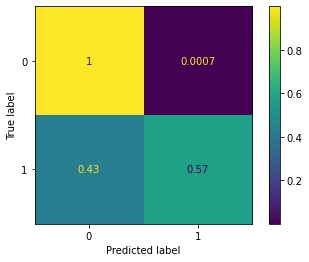

In [141]:
# evaluate the prediction on the test set
eval_results(tree_model, X_test, y_test)

### Logistic Regression

In [142]:
lr = LogisticRegression(max_iter=1000, class_weight = 'balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56962
           1       0.06      0.94      0.12        98

    accuracy                           0.98     57060
   macro avg       0.53      0.96      0.55     57060
weighted avg       1.00      0.98      0.99     57060

CONFUSION MATRIX
[[55617  1345]
 [    6    92]]


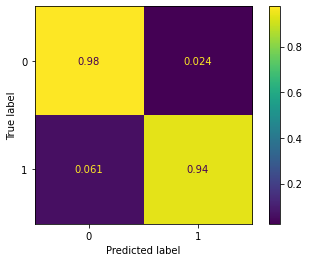

In [143]:
eval_results(lr, X_test, y_test)

### Support Vector Machines


In [152]:
svm = SVC(class_weight = 'balanced', max_iter=2000)
svm.fit(X_train, y_train)

C:\Users\Sophia.Schulze\Anaconda3\envs\deus2\lib\site-packages\sklearn\svm\_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(class_weight='balanced', max_iter=2000)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.00      0.00     56962
           1       0.00      0.73      0.00        98

    accuracy                           0.00     57060
   macro avg       0.38      0.37      0.00     57060
weighted avg       0.77      0.00      0.00     57060

CONFUSION MATRIX
[[   86 56876]
 [   26    72]]


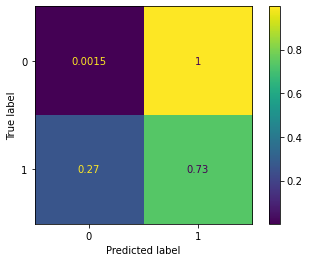

In [153]:
eval_results(svm, X_test, y_test)

### Random Forest

In [154]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.57      0.44      0.49        98

    accuracy                           1.00     57060
   macro avg       0.78      0.72      0.75     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56929    33]
 [   55    43]]


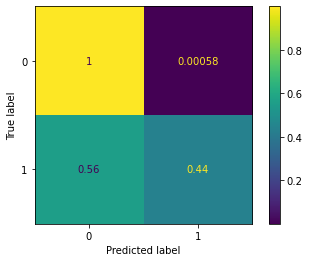

In [155]:
eval_results(rf, X_test, y_test)

### K-nearest Neighbor Classifier

In [156]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.35      0.37      0.36        98

    accuracy                           1.00     57060
   macro avg       0.67      0.68      0.68     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56894    68]
 [   62    36]]


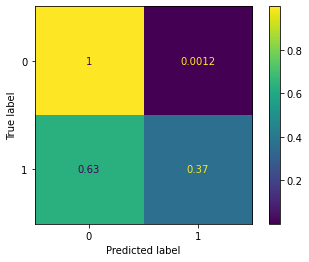

In [157]:
eval_results(knn, X_test, y_test)

## 4. Improvements

### Hyperparameter Tuning

In [59]:
# grid search
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print("Best parameters set found on development set: {}".format(CV_rfc.best_params_))

Best parameters set found on development set: {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [158]:
# use the parameters from the gridsearch
rfc_tuned=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.60      0.43      0.50        98

    accuracy                           1.00     57060
   macro avg       0.80      0.71      0.75     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56934    28]
 [   56    42]]


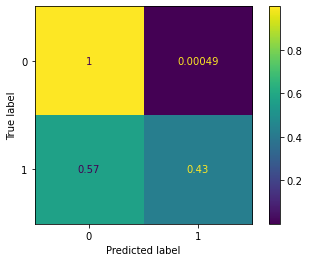

In [160]:
eval_results(rfc_tuned, X_test, y_test)

### Undersampling

In [161]:
# find the indices of the fraud and non-fraud cases
fraud_indices = df_norm[df_norm.fraud == 1].index
nonfraud_indices = df_norm[df_norm.fraud == 0].index
# from all non-fraud observations, randomly select observations equal to number of fraud observations
random_nonfraud_indices = np.array(np.random.choice(nonfraud_indices, len(df_norm[df_norm.fraud == 1]), replace = False))
# combine both lists of indices
undersample_indices = np.concatenate([fraud_indices, random_nonfraud_indices])
# create the data set
undersample_data = df_norm.iloc[undersample_indices,:]
# split the data set into input X and output y
X_undersample = undersample_data.drop('fraud', axis = 1).values
y_undersample = undersample_data['fraud'].values

In [162]:
# Split dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, np.array(y_undersample).ravel())
# instantiate model
model_undersampling = LogisticRegression()
# fit 
model_undersampling.fit(X_train_undersample, y_train_undersample)
# predict
y_pred_undersampling = model_undersampling.predict(X_test_undersample)
y_pred_all = model_undersampling.predict(X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       132
           1       1.00      0.88      0.93       114

    accuracy                           0.94       246
   macro avg       0.95      0.94      0.94       246
weighted avg       0.95      0.94      0.94       246

CONFUSION MATRIX
[[132   0]
 [ 14 100]]


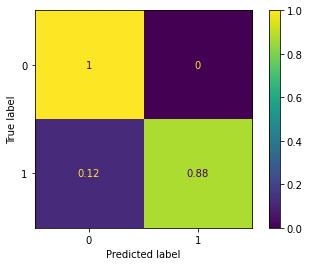

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.30      0.89      0.45        98

    accuracy                           1.00     57060
   macro avg       0.65      0.94      0.73     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56762   200]
 [   11    87]]


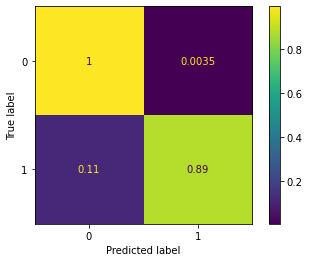

In [163]:
# on the test set from the undersampling
eval_results(model_undersampling, X_test_undersample, y_test_undersample)
# on the original test set
eval_results(model_undersampling, X_test, y_test)

### Oversampling

In [164]:
n = len(nonfraud_indices)//len(fraud_indices)
oversampling_frauds = pd.concat([df_norm.iloc[fraud_indices]]*n, ignore_index=True)
oversampling_data = pd.concat([oversampling_frauds, df_norm.iloc[nonfraud_indices]], ignore_index=True)
# split the data set into input X and output y
X_oversample = oversampling_data.drop('fraud', axis = 1).values
y_oversample = oversampling_data['fraud'].values

In [170]:
# Split dataset
X_train_oversample, X_test_oversample, y_train_oversample, y_test_oversample = train_test_split(X_oversample, np.array(y_oversample).ravel())
# instantiate model
model_oversampling = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
# fit 
model_oversampling.fit(X_train_oversample, y_train_oversample)
# predict
y_pred_oversampling = model_oversampling.predict(X_test_oversample)
y_pred_all_over = model_oversampling.predict(X_test)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     71306
           1       1.00      0.97      0.98     70990

    accuracy                           0.98    142296
   macro avg       0.98      0.98      0.98    142296
weighted avg       0.98      0.98      0.98    142296

CONFUSION MATRIX
[[71129   177]
 [ 2156 68834]]


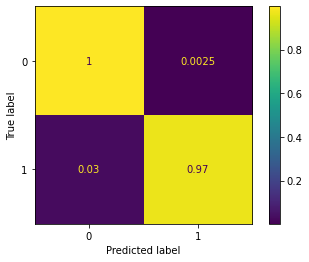

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.43      0.98      0.60        98

    accuracy                           1.00     57060
   macro avg       0.71      0.99      0.80     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56834   128]
 [    2    96]]


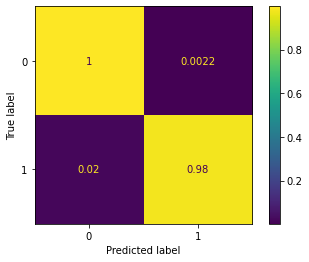

In [171]:
# on the test set from the oversampling
eval_results(model_oversampling, X_test_oversample, y_test_oversample)
# on the original test set
eval_results(model_oversampling, X_test, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [172]:
# transform the dataset
sm = imblearn.over_sampling.SMOTE()
X_sm, y_sm = sm.fit_resample(X, y)

In [173]:
# split the data set
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify = y_sm, random_state=42)

In [174]:
# train the random forest classifier on the newly sampled data
rfc_sm=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')
rfc_sm.fit(X_sm_train, y_sm_train)

RandomForestClassifier(max_depth=8, random_state=42)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     56962
           1       1.00      0.95      0.97     56961

    accuracy                           0.97    113923
   macro avg       0.98      0.97      0.97    113923
weighted avg       0.98      0.97      0.97    113923

CONFUSION MATRIX
[[56755   207]
 [ 2679 54282]]


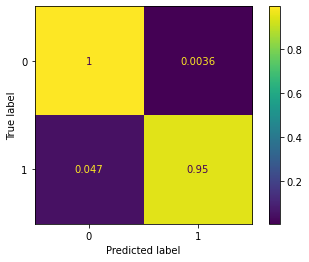

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56962
           1       0.31      0.98      0.48        98

    accuracy                           1.00     57060
   macro avg       0.66      0.99      0.74     57060
weighted avg       1.00      1.00      1.00     57060

CONFUSION MATRIX
[[56753   209]
 [    2    96]]


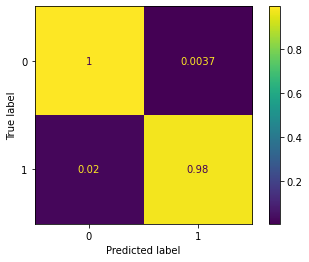

In [179]:
eval_results(rfc_sm, X_sm_test, y_sm_test)
eval_results(rfc_sm, X_test, y_test)

### Neural Network Approach

In [176]:
# define a simple feed-forward network
DNN = tf.keras.Sequential([
tf.keras.layers.Dense(input_dim = 29, units = 128, activation = "relu"),
tf.keras.layers.Dense(units= 64, activation = "relu"),
# include some drop out layers to prevent from overfitting
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units= 32, activation = "relu"),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units= 32, activation = "relu"),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units= 16, activation = "relu"),
#tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(units=1, activation = "sigmoid")])
DNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               3840      
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 15,777
Trainable params: 15,777
Non-trainable params: 0
__________________________________________________

In [177]:
# Metrics
metrics = [
    tf.keras.metrics.Accuracy(name="Accuracy"),
    tf.keras.metrics.Precision(name="Precision"),
    tf.keras.metrics.Recall(name="Recall")]
# Compiling and fiting the model
DNN.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = metrics)
DNN.fit(X_sm_train, y_sm_train, batch_size = 32, epochs = 10)
print("Evaluate on test data")
score = DNN.evaluate(X_test, y_test)
print("test loss, test accuracy, test precision, test recall:", score)

Train on 455691 samples
Epoch 1/10
455691/455691 [==============================] - 23s 51us/sample - loss: 0.1582 - Accuracy: 0.0000e+00 - Precision: 0.9650 - Recall: 0.9108
Epoch 2/10
455691/455691 [==============================] - 22s 47us/sample - loss: 0.1268 - Accuracy: 0.0000e+00 - Precision: 0.9688 - Recall: 0.9328
Epoch 3/10
455691/455691 [==============================] - 22s 49us/sample - loss: 0.0997 - Accuracy: 0.0000e+00 - Precision: 0.9697 - Recall: 0.9528
Epoch 4/10
455691/455691 [==============================] - 22s 48us/sample - loss: 0.0774 - Accuracy: 2.1945e-06 - Precision: 0.9719 - Recall: 0.9682
Epoch 5/10
455691/455691 [==============================] - 23s 50us/sample - loss: 0.0621 - Accuracy: 6.5834e-06 - Precision: 0.9752 - Recall: 0.9784
Epoch 6/10
455691/455691 [==============================] - 23s 51us/sample - loss: 0.0520 - Accuracy: 1.0972e-05 - Precision: 0.9786 - Recall: 0.9837
Epoch 7/10
455691/455691 [==============================] - 22s 48us/s

## 5. One-Class Classifier

In [ ]:
# define outlier detection model
one_class = OneClassSVM(max_iter=1000)
# fit on non fraudulent cases
nonfraud_data = X_train[y_train[y_train==0]]
one_class.fit(nonfraud_data)
# mark inliers 1, outliers -1
y_one = y_test.copy()

y_one[y_one == 1] = -1
y_one[y_one == 0] = 1

eval_results(one_class, X_test, y_one)